# 数据处理

In [1]:
import pandas as pd
from ast import literal_eval

data_path = '/Users/jenny/Desktop/ProjectCode/all_user_choices.csv' # 文件路径
data = pd.read_csv(data_path)

# data 是原始数据框，复制到Adata中，进行后续操作
Adata = data.copy()

Adata.info()

# 打印数据的前5行
print(Adata.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Index                     206 non-null    int64  
 1   Probe 1 Color             206 non-null    object 
 2   Probe 2 Color             206 non-null    object 
 3   Probe 1 Brightness        206 non-null    float64
 4   Probe 2 Brightness        206 non-null    float64
 5   Environment 1 Color       206 non-null    object 
 6   Environment 2 Color       206 non-null    object 
 7   Environment 1 Brightness  206 non-null    int64  
 8   Environment 2 Brightness  206 non-null    int64  
 9   Env1_Texture              206 non-null    object 
 10  Env2_Texture              206 non-null    object 
 11  Environment 2 Contrast    206 non-null    float64
 12  Environment 2 Saturation  206 non-null    float64
 13  Brighter Probe            206 non-null    object 
 14  Unnamed: 1

In [2]:

# 删除多余的异常列（14列之后）
cols_to_drop = Adata.columns[14:]
Adata.drop(cols_to_drop, axis=1, inplace=True)

print(Adata.head())



   Index    Probe 1 Color    Probe 2 Color  Probe 1 Brightness  \
0      1  [116, 120, 122]  [116, 120, 122]            0.588235   
1      2  [116, 120, 122]  [116, 120, 122]            0.588235   
2      3  [116, 120, 122]  [116, 120, 122]            0.588235   
3      4  [116, 120, 122]  [116, 120, 122]            0.588235   
4      5  [116, 120, 122]  [116, 120, 122]            0.588235   

   Probe 2 Brightness Environment 1 Color Environment 2 Color  \
0            0.588235     [200, 173, 196]     [200, 173, 196]   
1            0.588235     [200, 173, 196]     [200, 173, 196]   
2            0.588235     [200, 173, 196]     [200, 173, 196]   
3            0.588235     [200, 173, 196]     [200, 173, 196]   
4            0.588235     [200, 173, 196]     [200, 173, 196]   

   Environment 1 Brightness  Environment 2 Brightness Env1_Texture  \
0                       234                        82         none   
1                       147                        82         none   
2 

In [3]:
# 将含有list的列转化为字符串
Adata['Probe 1 Color'] = Adata['Probe 1 Color'].apply(str)
Adata['Probe 2 Color'] = Adata['Probe 2 Color'].apply(str)
Adata['Environment 1 Color'] = Adata['Environment 1 Color'].apply(str)
Adata['Environment 2 Color'] = Adata['Environment 2 Color'].apply(str)

# 找出重复行
duplicates = Adata[Adata.duplicated()]

# 打印重复行
print("Duplicate Rows:")
print(duplicates)

# 删除重复行
Adata = Adata.drop_duplicates()


# 异常值检查
# 1. 检查RGB列
rgb_columns = ["Probe 1 Color", "Probe 2 Color", "Environment 1 Color", "Environment 2 Color"]

for col in rgb_columns:
    # 使用 literal_eval 将字符串转为列表
    Adata[col] = Adata[col].apply(literal_eval)
    
    # 检查RGB值是否在0到255之间
    mask = Adata[col].apply(lambda x: all(0 <= val <= 255 for val in x))
    if not mask.all():
        print(f"Column {col} has invalid RGB values:")
        print(Adata[~mask])

        
        
# 2. 检查Probe 1 Brightness和Probe 2 Brightness列
brightness_columns = ["Probe 1 Brightness", "Probe 2 Brightness"]
for column in brightness_columns:
    invalid_brightness = Adata[(Adata[column] < 0) | (Adata[column] > 1)]
    if not invalid_brightness.empty:
        print(f"Invalid {column}:")
        print(invalid_brightness[column])
        
# 检查Environment 1、2 Brightness
environment_brightness_columns = ["Environment 1 Brightness", "Environment 2 Brightness"]
for column in environment_brightness_columns:
    invalid_brightness = Adata[(Adata[column] < 0) | (Adata[column] > 255)]
    if not invalid_brightness.empty:
        print(f"Invalid {column}:")
        print(invalid_brightness[column])
        
# 检查Environment 2 Contrast 和 Environment 2 Saturation列
columns_to_check = ["Environment 2 Contrast", "Environment 2 Saturation"]

for column in columns_to_check:
    invalid_values = Adata[(Adata[column] < 0) | (Adata[column] > 2)]
    if not invalid_values.empty:
        print(f"Invalid values in {column}:")
        print(invalid_values[[column]])

        

# 3. 检查纹理和其他分类数据
texture_columns = ["Env1_Texture", "Env2_Texture"]
expected_textures = ["none", "noise", "stripes", "dots"]

for col in texture_columns:
    mask = Adata[col].isin(expected_textures)
    if not mask.all():
        print(f"Column {col} has unexpected values:")
        print(Adata[~mask])

        
# 4. 检查 Brighter Probe 列
expected_values = ["Probe 1", "Probe 2", "Similar"]
mask = Adata["Brighter Probe"].isin(expected_values)
if not mask.all():
    print("Brighter Probe has unexpected values:")
    print(Adata[~mask]["Brighter Probe"].unique())  # 打印那些未预期的值


Duplicate Rows:
Empty DataFrame
Columns: [Index, Probe 1 Color, Probe 2 Color, Probe 1 Brightness, Probe 2 Brightness, Environment 1 Color, Environment 2 Color, Environment 1 Brightness, Environment 2 Brightness, Env1_Texture, Env2_Texture, Environment 2 Contrast, Environment 2 Saturation, Brighter Probe]
Index: []
Brighter Probe has unexpected values:
['Similar36']


In [4]:
# 替换这个异常值为“Similar”
Adata["Brighter Probe"] = Adata["Brighter Probe"].replace("Similar36", "Similar")
print(Adata.head())


   Index    Probe 1 Color    Probe 2 Color  Probe 1 Brightness  \
0      1  [116, 120, 122]  [116, 120, 122]            0.588235   
1      2  [116, 120, 122]  [116, 120, 122]            0.588235   
2      3  [116, 120, 122]  [116, 120, 122]            0.588235   
3      4  [116, 120, 122]  [116, 120, 122]            0.588235   
4      5  [116, 120, 122]  [116, 120, 122]            0.588235   

   Probe 2 Brightness Environment 1 Color Environment 2 Color  \
0            0.588235     [200, 173, 196]     [200, 173, 196]   
1            0.588235     [200, 173, 196]     [200, 173, 196]   
2            0.588235     [200, 173, 196]     [200, 173, 196]   
3            0.588235     [200, 173, 196]     [200, 173, 196]   
4            0.588235     [200, 173, 196]     [200, 173, 196]   

   Environment 1 Brightness  Environment 2 Brightness Env1_Texture  \
0                       234                        82         none   
1                       147                        82         none   
2 

env1_brightness_mean: 151.92233009708738
env2_brightness_mean: 150.69417475728156


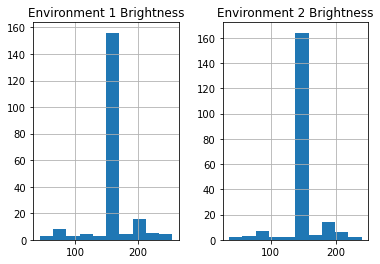

env2_contrast_mean: 0.987864077669903
env2_saturation_mean: 1.0257281553398059


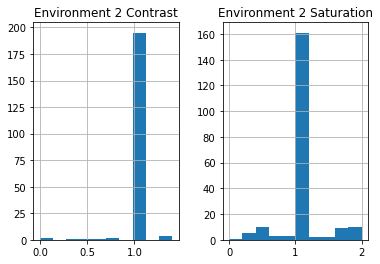

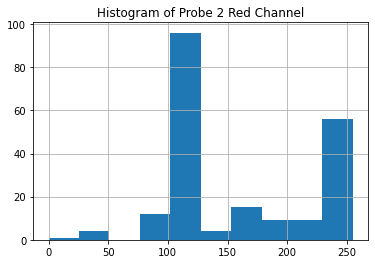

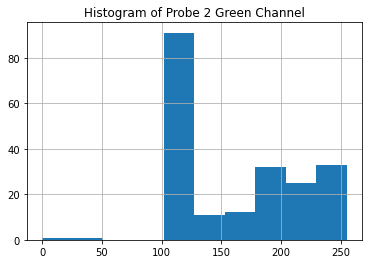

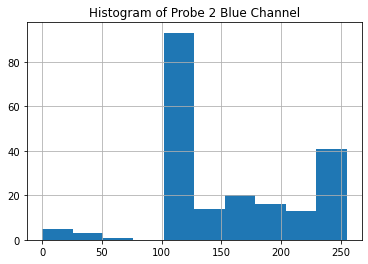

Brighter probe:
 Probe 1    94
Probe 2    82
Similar    30
Name: Brighter Probe, dtype: int64


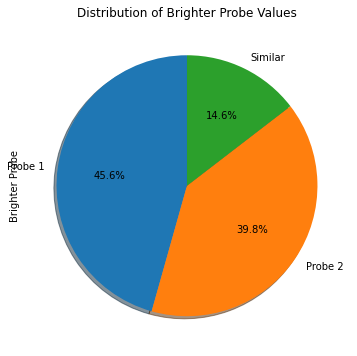

In [5]:
import matplotlib.pyplot as plt

# 亮度分析
print("env1_brightness_mean:", Adata['Environment 1 Brightness'].mean())
print("env2_brightness_mean:", Adata['Environment 2 Brightness'].mean())
Adata[['Environment 1 Brightness', 'Environment 2 Brightness']].hist()
plt.show()

# 对比度和饱和度分析
print("env2_contrast_mean:", Adata['Environment 2 Contrast'].mean())
print("env2_saturation_mean:", Adata['Environment 2 Saturation'].mean())
Adata[['Environment 2 Contrast', 'Environment 2 Saturation']].hist()
plt.show()

# probe2 rgb通道分析
Adata['Probe 2 Red'] = Adata['Probe 2 Color'].apply(lambda x: x[0])
Adata['Probe 2 Red'].hist()
plt.title("Histogram of Probe 2 Red Channel")
plt.show()

Adata['Probe 2 Green'] = Adata['Probe 2 Color'].apply(lambda x: x[1])
Adata['Probe 2 Green'].hist()
plt.title("Histogram of Probe 2 Green Channel")
plt.show()

Adata['Probe 2 Blue'] = Adata['Probe 2 Color'].apply(lambda x: x[2])
Adata['Probe 2 Blue'].hist()
plt.title("Histogram of Probe 2 Blue Channel")
plt.show()

# 用户选择分析
print("Brighter probe:\n", Adata['Brighter Probe'].value_counts())

# 获取 Brighter Probe 的值计数
probe_counts = Adata['Brighter Probe'].value_counts()

# 绘制饼图
plt.figure(figsize=(10, 6))
probe_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)

plt.title('Distribution of Brighter Probe Values')  # 设置标题

# 显示饼图
plt.show()



In [6]:

# 数据的摘要统计信息
summary_stats = Adata.describe()
print(summary_stats)



            Index  Probe 1 Brightness  Probe 2 Brightness  \
count  206.000000          206.000000          206.000000   
mean   103.500000            0.575785            0.582315   
std     59.611241            0.096086            0.064573   
min      1.000000            0.094118            0.137255   
25%     52.250000            0.588235            0.588235   
50%    103.500000            0.588235            0.588235   
75%    154.750000            0.588235            0.588235   
max    206.000000            1.000000            1.000000   

       Environment 1 Brightness  Environment 2 Brightness  \
count                206.000000                206.000000   
mean                 151.922330                150.694175   
std                   30.241528                 26.343485   
min                   44.000000                 36.000000   
25%                  150.000000                150.000000   
50%                  150.000000                150.000000   
75%                  15

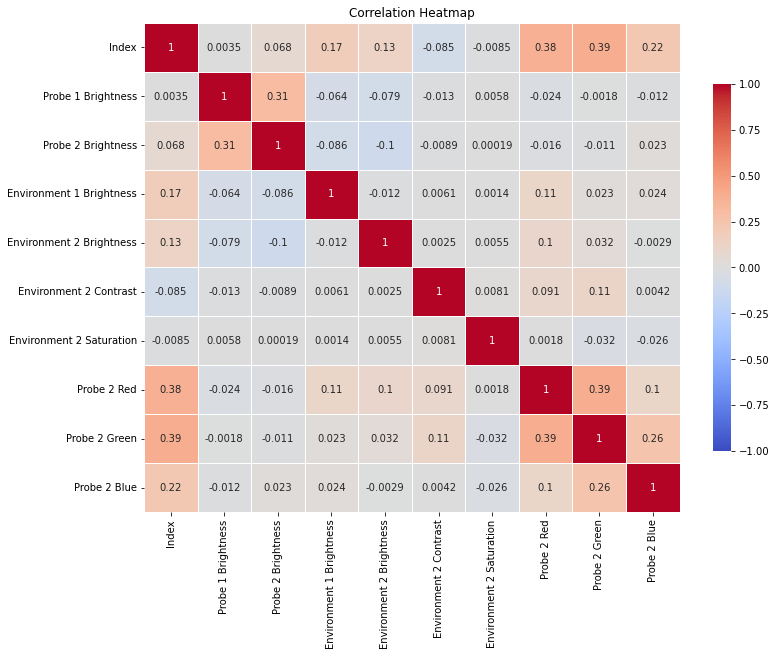

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算各参数相关性
correlations = Adata.corr()

# 设置绘图的大小
plt.figure(figsize=(12, 9))

# 使用 seaborn 绘制热图
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.75})

# 设置标题
plt.title('Correlation Heatmap')

# 显示热图
plt.show()


# 光照强度的影响

In [8]:
# 筛选条件
condition = (
    (Adata['Probe 1 Color'] == Adata['Probe 2 Color']) &
    (Adata['Probe 1 Brightness'] != Adata['Probe 2 Brightness']) &
    (Adata['Environment 1 Color'] == Adata['Environment 2 Color']) &
    (Adata['Environment 1 Brightness'] == Adata['Environment 2 Brightness']) &
    (Adata['Env1_Texture'] == Adata['Env2_Texture']) &
    (Adata['Environment 2 Contrast'] == Adata['Environment 2 Contrast']) &
    (Adata['Environment 2 Saturation'] == Adata['Environment 2 Saturation'])
)

# 应用筛选条件
filtered_data = Adata[condition]

# 创建一个DataFrame的副本
filtered_data_copy = filtered_data.copy()

# 将“Brighter Probe”列转换为数值，Probe 1为1，Probe 2为2，Similar为0
def encode_choice(choice):
    if choice == 'Probe 1':
        return 1
    elif choice == 'Probe 2':
        return 2
    else:
        return 0

# 在此副本上进行操作
filtered_data_copy['Brighter Probe'] = filtered_data_copy['Brighter Probe'].apply(encode_choice)

# 继续使用filtered_data_copy进行分析
print(filtered_data[['Index', 'Probe 1 Brightness', 'Probe 2 Brightness', 'Brighter Probe']])

# 计算Probe 1和Probe 2的亮度与用户选择之间的皮尔逊相关系数
correlation_probe1 = filtered_data_copy['Probe 1 Brightness'].corr(filtered_data_copy['Brighter Probe'])
correlation_probe2 = filtered_data_copy['Probe 2 Brightness'].corr(filtered_data_copy['Brighter Probe'])

print(f'Correlation between Probe 1 Brightness and User Choice: {correlation_probe1}')
print(f'Correlation between Probe 2 Brightness and User Choice: {correlation_probe2}')


     Index  Probe 1 Brightness  Probe 2 Brightness Brighter Probe
7        8            0.768627            0.588235        Probe 1
8        9            0.309804            0.380392        Similar
9       10            0.309804            0.611765        Probe 2
10      11            0.780392            0.611765        Probe 1
11      12            0.094118            0.286275        Similar
12      13            0.094118            0.137255        Similar
46      47            0.760784            0.588235        Probe 1
47      48            0.274510            0.631373        Probe 2
48      49            0.588235            0.552941        Similar
55      56            0.768627            0.588235        Probe 1
56      57            0.768627            0.835294        Probe 2
57      58            0.768627            0.474510        Probe 1
103    104            0.749020            0.588235        Probe 1
104    105            0.749020            0.588235        Probe 1
105    106

In [9]:
import numpy as np


# 1. 创建新的列表示真正的Brighter Probe
filtered_data_copy['Actual Brighter Probe'] = np.where(
    filtered_data_copy['Probe 1 Brightness'] > filtered_data_copy['Probe 2 Brightness'], 1, 
    np.where(filtered_data_copy['Probe 1 Brightness'] < filtered_data_copy['Probe 2 Brightness'], 2, 0)
)

# 2. 比较实际Brighter Probe和用户选择的Brighter Probe
filtered_data_copy['Correct Choice'] = np.where(
    filtered_data_copy['Actual Brighter Probe'] == filtered_data_copy['Brighter Probe'], 
    1, 
    0
)

# 3. 计算匹配的比例
correct_choice_percentage = filtered_data_copy['Correct Choice'].mean() * 100
print(f"Percentage of users making the correct choice: {correct_choice_percentage:.2f}%")


# 计算亮度差异的绝对值
filtered_data_copy['Absolute Brightness Difference'] = abs(filtered_data_copy['Probe 1 Brightness'] - filtered_data_copy['Probe 2 Brightness'])

# 分析绝对亮度差异与用户选择的相关性
correlation_absolute_difference = filtered_data_copy['Absolute Brightness Difference'].corr(filtered_data_copy['Brighter Probe'])

print(f'Correlation between Absolute Brightness Difference and User Choice: {correlation_absolute_difference:.2f}')



Percentage of users making the correct choice: 72.73%
Correlation between Absolute Brightness Difference and User Choice: 0.17


# 光源色温的影响

In [10]:
pip install colour-science

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import colour


# 将含有list的列转化为字符串
Adata['Probe 1 Color'] = Adata['Probe 1 Color'].apply(str)
Adata['Probe 2 Color'] = Adata['Probe 2 Color'].apply(str)
Adata['Environment 1 Color'] = Adata['Environment 1 Color'].apply(str)
Adata['Environment 2 Color'] = Adata['Environment 2 Color'].apply(str)


# 定义筛选条件

condition = (
    (Adata['Probe 1 Color'] != Adata['Probe 2 Color']) &
    (Adata['Probe 1 Brightness'] == Adata['Probe 2 Brightness']) &
    (Adata['Environment 1 Color'] == Adata['Environment 2 Color']) &
    (Adata['Environment 1 Brightness'] == Adata['Environment 2 Brightness']) &
    (Adata['Env1_Texture'] == Adata['Env2_Texture']) &
    (Adata['Environment 2 Contrast'] == Adata['Environment 2 Contrast']) &
    (Adata['Environment 2 Saturation'] == Adata['Environment 2 Saturation'])
)


color_filtered_Adata = Adata[condition]

# 将Probe 1 Color和Probe 2 Color的列转换回列表形式，以便进行进一步的色温计算
color_filtered_Adata.loc[:, 'Probe 1 Color'] = color_filtered_Adata['Probe 1 Color'].apply(eval)
color_filtered_Adata.loc[:, 'Probe 2 Color'] = color_filtered_Adata['Probe 2 Color'].apply(eval)


print(color_filtered_Adata[['Index', 'Probe 1 Color', 'Probe 2 Color', 'Brighter Probe']])


def rgb_to_cct_verbose(rgb_values):
    try:
        XYZ_values = colour.sRGB_to_XYZ(rgb_values)
        cct = colour.xy_to_CCT(colour.XYZ_to_xy(XYZ_values))
        return cct
    except Exception as e:
        print(f"Error with RGB {rgb_values}: {e}")
        return None


color_filtered_Adata['Probe 1 CCT'] = color_filtered_Adata['Probe 1 Color'].apply(rgb_to_cct_verbose)
color_filtered_Adata['Probe 2 CCT'] = color_filtered_Adata['Probe 2 Color'].apply(rgb_to_cct_verbose)

# 设置浮点数的显示格式，使其始终显示为小数，并保留2位小数
pd.set_option('display.float_format', '{:.2f}'.format)

# 打印
print(color_filtered_Adata[['Index', 'Probe 1 Color','Probe 1 CCT', 'Probe 2 Color', 'Probe 2 CCT', 'Brighter Probe']])




/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/2576199259.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_filtered_Adata.loc[:, 'Probe 1 Color'] = color_filtered_Adata['Probe 1 Color'].apply(eval)
/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/2576199259.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_filtered_Adata.loc[:, 'Probe 2 Color'] = color_filtered_Adata['Probe 2 Color'].apply(eval)
/Applications/anaconda3/lib/python3.9/site-packages/colour/uti

     Index    Probe 1 Color    Probe 2 Color Brighter Probe
13      14  [116, 120, 122]  [158, 138, 122]        Probe 2
14      15  [116, 120, 122]  [116, 120, 167]        Probe 2
15      16  [116, 120, 122]  [182, 146, 122]        Probe 2
49      50  [116, 120, 122]  [116, 120, 159]        Probe 2
50      51  [116, 120, 122]  [164, 149, 122]        Probe 2
58      59  [116, 120, 122]  [149, 147, 122]        Probe 1
59      60  [116, 120, 122]  [116, 120, 149]        Probe 2
60      61  [116, 120, 122]   [90, 109, 144]        Probe 2
61      62  [116, 120, 122]  [146, 135, 122]        Probe 1
62      63  [116, 120, 122]  [126, 129, 122]        Similar
77      78  [255, 249, 168]  [255, 249, 223]        Probe 2
114    115  [182, 216, 255]  [208, 235, 255]        Probe 2
115    116  [182, 216, 255]  [182, 216, 178]        Probe 1
142    143  [111, 255, 201]  [172, 255, 201]        Probe 2
143    144  [111, 255, 201]   [87, 255, 231]        Probe 2
144    145   [255, 230, 36]  [255, 230, 

/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/2576199259.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_filtered_Adata['Probe 1 CCT'] = color_filtered_Adata['Probe 1 Color'].apply(rgb_to_cct_verbose)
/Applications/anaconda3/lib/python3.9/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: Correlated colour temperature must be in domain [4000, 25000], unpredictable results may occur!
  warn(*args, **kwargs)


     Index    Probe 1 Color  Probe 1 CCT    Probe 2 Color  \
13      14  [116, 120, 122]      6913.86  [158, 138, 122]   
14      15  [116, 120, 122]      6913.86  [116, 120, 167]   
15      16  [116, 120, 122]      6913.86  [182, 146, 122]   
49      50  [116, 120, 122]      6913.86  [116, 120, 159]   
50      51  [116, 120, 122]      6913.86  [164, 149, 122]   
58      59  [116, 120, 122]      6913.86  [149, 147, 122]   
59      60  [116, 120, 122]      6913.86  [116, 120, 149]   
60      61  [116, 120, 122]      6913.86   [90, 109, 144]   
61      62  [116, 120, 122]      6913.86  [146, 135, 122]   
62      63  [116, 120, 122]      6913.86  [126, 129, 122]   
77      78  [255, 249, 168]      3943.84  [255, 249, 223]   
114    115  [182, 216, 255]     12421.30  [208, 235, 255]   
115    116  [182, 216, 255]     12421.30  [182, 216, 178]   
142    143  [111, 255, 201]      5989.06  [172, 255, 201]   
143    144  [111, 255, 201]      5989.06   [87, 255, 231]   
144    145   [255, 230, 

/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/2576199259.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_filtered_Adata['Probe 2 CCT'] = color_filtered_Adata['Probe 2 Color'].apply(rgb_to_cct_verbose)


In [12]:
# 1. 计算色温差异
color_filtered_Adata['CCT Difference'] = color_filtered_Adata['Probe 1 CCT'] - color_filtered_Adata['Probe 2 CCT']

# 2. 标记色温较低的探头
color_filtered_Adata['Lower CCT Probe'] = color_filtered_Adata.apply(
    lambda row: 'Probe 1' if row['Probe 1 CCT'] < row['Probe 2 CCT'] else 'Probe 2', axis=1)

print(color_filtered_Adata[['Index','Probe 1 CCT', 'Probe 2 CCT', 'Lower CCT Probe', 'CCT Difference', 'Brighter Probe']])

# 3. 比较选择的探头与色温较低的探头
color_filtered_Adata['Chose Lower CCT'] = color_filtered_Adata['Brighter Probe'] == color_filtered_Adata['Lower CCT Probe']

# 4. 统计选择了色温较低探头的行数
chosen_lower_cct_count = color_filtered_Adata['Chose Lower CCT'].sum()
total_rows = len(color_filtered_Adata)
percentage_chosen_lower_cct = (chosen_lower_cct_count / total_rows) * 100

print(f"\nUsers chose the probe with a lower CCT in {percentage_chosen_lower_cct:.2f}% of the cases.")


     Index  Probe 1 CCT            Probe 2 CCT Lower CCT Probe  \
13      14      6913.86                4802.50         Probe 2   
14      15      6913.86               36397.71         Probe 1   
15      16      6913.86                4174.21         Probe 2   
49      50      6913.86               19823.35         Probe 1   
50      51      6913.86                4504.22         Probe 2   
58      59      6913.86                4839.05         Probe 2   
59      60      6913.86               13010.88         Probe 1   
60      61      6913.86               31708.00         Probe 1   
61      62      6913.86                5174.53         Probe 2   
62      63      6913.86                5983.04         Probe 2   
77      78      3943.84                5314.42         Probe 1   
114    115     12421.30                8722.67         Probe 2   
115    116     12421.30                5314.70         Probe 2   
142    143      5989.06                5475.43         Probe 2   
143    144

/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/1663448826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_filtered_Adata['CCT Difference'] = color_filtered_Adata['Probe 1 CCT'] - color_filtered_Adata['Probe 2 CCT']
/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/1663448826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_filtered_Adata['Lower CCT Probe'] = color_filtered_Adata.apply(
/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/166344882

# 背景亮度的影响

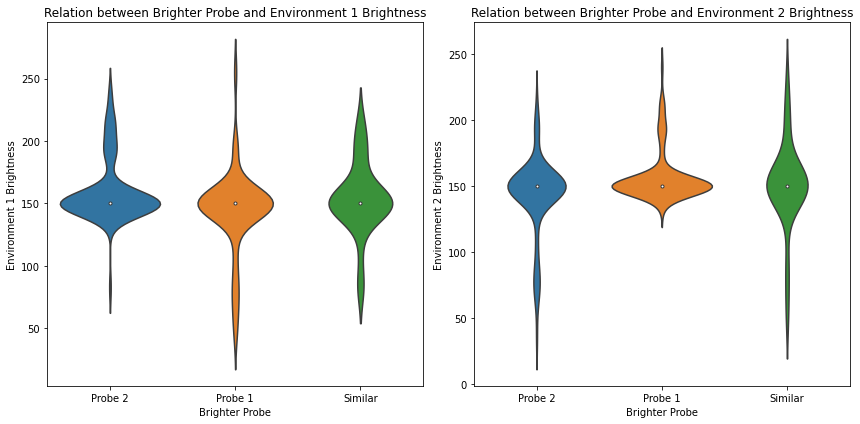

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Env Brightness Violin Plot：
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='Brighter Probe', y='Environment 1 Brightness', data=Adata)
plt.title('Relation between Brighter Probe and Environment 1 Brightness')

plt.subplot(1, 2, 2)
sns.violinplot(x='Brighter Probe', y='Environment 2 Brightness', data=Adata)
plt.title('Relation between Brighter Probe and Environment 2 Brightness')

plt.tight_layout()
plt.show()


     Index  Environment 1 Brightness  Environment 2 Brightness Brighter Probe
0        1                       234                        82        Probe 2
1        2                       147                        82        Probe 2
2        3                       111                       208        Probe 1
3        4                        49                       208        Probe 1
4        5                       196                       208        Similar
5        6                       196                        77        Probe 2
6        7                        85                        77        Similar
35      36                        67                       240        Probe 1
36      37                        67                       134        Probe 1
37      38                       214                        88        Probe 2
38      39                       111                       178        Probe 1
39      40                       181                       228  

/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/2719886140.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_brightness_selected['Brighter_Probe_Encoded'] = env_brightness_selected['Brighter Probe'].apply(encode_choice)


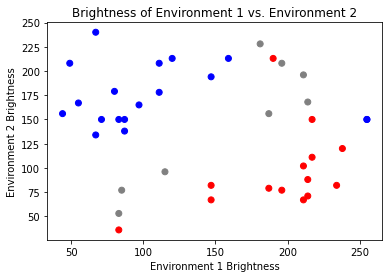

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 定义筛选条件
condition = (
    (Adata['Probe 1 Color'] == Adata['Probe 2 Color']) &
    (Adata['Probe 1 Brightness'] == Adata['Probe 2 Brightness']) &
    (Adata['Environment 1 Color'] == Adata['Environment 2 Color']) &
    (Adata['Environment 1 Brightness'] != Adata['Environment 2 Brightness']) &
    (Adata['Env1_Texture'] == Adata['Env2_Texture']) &
    (Adata['Environment 2 Contrast'] == Adata['Environment 2 Contrast']) &
    (Adata['Environment 2 Saturation'] == Adata['Environment 2 Saturation'])
)

env_brightness_selected = Adata[condition]

print(env_brightness_selected[['Index', 'Environment 1 Brightness', 'Environment 2 Brightness', 'Brighter Probe']])


# 应用encode_choice函数来获得编码列
env_brightness_selected['Brighter_Probe_Encoded'] = env_brightness_selected['Brighter Probe'].apply(encode_choice)

# 创建颜色映射字典
colors = {0: 'gray', 1: 'blue', 2: 'red'}

# 使用 `map` 函数将 'Brighter_Probe_Encoded' 列的值映射为颜色
point_colors = env_brightness_selected['Brighter_Probe_Encoded'].map(colors)

# 散点图
plt.scatter(env_brightness_selected['Environment 1 Brightness'], env_brightness_selected['Environment 2 Brightness'], c=point_colors)
plt.xlabel('Environment 1 Brightness')
plt.ylabel('Environment 2 Brightness')
plt.title('Brightness of Environment 1 vs. Environment 2')

plt.show()



# # 逻辑回归
# X = env_brightness_selected[['Environment 1 Brightness', 'Environment 2 Brightness']]
# y = env_brightness_selected['Brighter Probe']

# model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# model.fit(X, y)

# # 获取模型的系数
# coeffs = model.coef_

# print("Coefficients:")
# print("For 'Similar':", coeffs[0])
# print("For 'Probe 1':", coeffs[1])
# print("For 'Probe 2':", coeffs[2])



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 使用你提供的数据准备数据集
X = env_brightness_selected[['Environment 1 Brightness', 'Environment 2 Brightness']]
y = env_brightness_selected['Brighter Probe']

# 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化决策树模型
tree_model = DecisionTreeClassifier()

# 训练模型
tree_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = tree_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%")

# 输出特征重要性
feature_importances = tree_model.feature_importances_
print("Feature importances:")
for feature, importance in zip(['Environment 1 Brightness', 'Environment 2 Brightness'], feature_importances):
    print(f"{feature}: {importance:.4f}")


Model accuracy on test set: 75.00%
Feature importances:
Environment 1 Brightness: 0.4400
Environment 2 Brightness: 0.5600


In [ ]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# import seaborn as sns
# #


# # 绘制亮度分布的直方图
# sns.histplot(env_brightness_selected['Environment 1 Brightness'], kde=True, label="Environment 1 Brightness")
# sns.histplot(env_brightness_selected['Environment 2 Brightness'], kde=True, color='red', label="Environment 2 Brightness")
# plt.legend()
# plt.show()

# # 筛选掉"Similar"的数据并创建一个副本
# binary_data = env_brightness_selected[env_brightness_selected['Brighter Probe'] != 0].copy()

# # 构建亮度差值变量
# binary_data['Brightness Difference'] = binary_data['Environment 1 Brightness'] - binary_data['Environment 2 Brightness']

# # 将'Brighter Probe'列中的2重新编码为0
# binary_data['Brighter Probe'] = binary_data['Brighter Probe'].replace(2, 0)

# # 定义解释变量和应变量
# X = binary_data[['Environment 1 Brightness', 'Environment 2 Brightness', 'Brightness Difference']]
# X = sm.add_constant(X)  # 添加截距项
# y = binary_data['Brighter Probe']

# # 使用statsmodels进行逻辑回归
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()
# print(result.summary())


# 背景饱和度的影响

     Index  Environment 2 Saturation Brighter Probe
24      25                      1.70        Probe 2
25      26                      0.70        Similar
26      27                      0.30        Similar
27      28                      1.70        Similar
51      52                      2.00        Probe 2
52      53                      0.70        Similar
53      54                      1.30        Probe 2
63      64                      1.80        Probe 1
64      65                      0.50        Probe 2
65      66                      0.80        Similar
66      67                      0.30        Probe 2
67      68                      1.90        Probe 1
68      69                      1.90        Probe 1
69      70                      0.60        Probe 2
75      76                      1.70        Probe 2
76      77                      0.30        Probe 2
78      79                      1.90        Probe 1
79      80                      0.40        Probe 2
80      81  

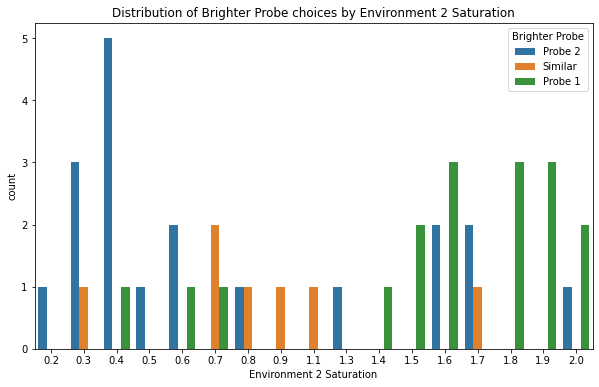

In [18]:
# 定义筛选条件
condition = (
    (Adata['Probe 1 Color'] == Adata['Probe 2 Color']) &
    (Adata['Probe 1 Brightness'] == Adata['Probe 2 Brightness']) &
    (Adata['Environment 1 Color'] == Adata['Environment 2 Color']) &
    (Adata['Environment 1 Brightness'] == Adata['Environment 2 Brightness']) &
    (Adata['Env1_Texture'] == Adata['Env2_Texture']) &
    (Adata['Environment 2 Contrast'] == 1.0) &
    (Adata['Environment 2 Saturation'] != 1.0)
)
saturation_filtered_Adata = Adata[condition]
           
print(saturation_filtered_Adata[['Index', 'Environment 2 Saturation', 'Brighter Probe']])


import seaborn as sns
import matplotlib.pyplot as plt

# 使用条形图显示Brighter Probe的选择分布，分别按Environment 2 Saturation分组
plt.figure(figsize=(10, 6))
sns.countplot(data=saturation_filtered_Adata, x='Environment 2 Saturation', hue='Brighter Probe')
plt.title("Distribution of Brighter Probe choices by Environment 2 Saturation")
plt.show()

        

In [19]:
# 对Brighter Probe进行编码
saturation_filtered_Adata['Brighter_Probe_Encoded'] = saturation_filtered_Adata['Brighter Probe'].map({'Probe 1': 1, 'Probe 2': 2, 'Similar': 0})

# 多项逻辑回归
import statsmodels.api as sm

X = sm.add_constant(saturation_filtered_Adata['Environment 2 Saturation'])
y = saturation_filtered_Adata['Brighter_Probe_Encoded']
model = sm.MNLogit(y, X).fit()
print(model.summary())



/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/2124067233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturation_filtered_Adata['Brighter_Probe_Encoded'] = saturation_filtered_Adata['Brighter Probe'].map({'Probe 1': 1, 'Probe 2': 2, 'Similar': 0})


Optimization terminated successfully.
         Current function value: 0.860391
         Iterations 5
                            MNLogit Regression Results                            
Dep. Variable:     Brighter_Probe_Encoded   No. Observations:                   43
Model:                            MNLogit   Df Residuals:                       39
Method:                               MLE   Df Model:                            2
Date:                    Wed, 16 Aug 2023   Pseudo R-squ.:                  0.1592
Time:                            12:45:56   Log-Likelihood:                -36.997
converged:                           True   LL-Null:                       -44.001
Covariance Type:                nonrobust   LLR p-value:                 0.0009078
Brighter_Probe_Encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.5563      1.113  

模型指标:

Log-Likelihood: 这是模型的对数似然值，它表示模型的拟合度。当与一个空模型（即只有常数项，不包含任何解释变量）的对数似然值（LL-Null）进行比较时，可以用来确定模型是否有统计意义。越接近0表示模型拟合得越好。
LLR p-value: 这是一个检验统计量，用来比较当前模型与一个不包含任何解释变量的空模型。如果p值小于某个显著性水平（通常是0.05），则我们可以拒绝原假设，认为模型是有意义的。


回归系数:

对于Brighter_Probe_Encoded=1（即Probe 1）:
const: 这是常数项，当Environment 2 Saturation为0时的估计值。
Environment 2 Saturation: 这是主要的解释变量。coef值表示饱和度每增加1单位，对应类别的对数几率比会增加4.9578单位，与基准类别（即Similar）相比。
对于Brighter_Probe_Encoded=2（即Probe 2）:
const: 当Environment 2 Saturation为0时的估计值。
Environment 2 Saturation: 对于这个类别，饱和度每增加1单位，其对数几率比会减少0.1646单位，与基准类别（即Similar）相比。


p值:

用于评估每个解释变量对应的回归系数是否显著。在这里，Environment 2 Saturation对于Brighter_Probe_Encoded=1的p值是0.089，对于Brighter_Probe_Encoded=2的p值是0.855。在显著性水平为0.05的情况下，这两个变量都不是显著的。但是对于Brighter_Probe_Encoded=1，p值接近于0.05，这可能意味着在更大的样本量下，这个变量可能是显著的。
结论:

Environment 2 Saturation在这个模型中对于预测Brighter Probe的选择并不显著，但接近显著，这可能是由于样本量较小或其他原因。建议在更大的样本量下重新进行分析。

# 背景纹理和对比度的影响

     Index Env1_Texture Env2_Texture  Environment 2 Contrast Brighter Probe
16      17         none        noise                    1.00        Probe 1
17      18         none        noise                    1.30        Probe 2
18      19         none        noise                    0.50        Probe 2
19      20         none        noise                    0.80        Probe 1
20      21         none      stripes                    1.00        Probe 1
21      22         none      stripes                    1.30        Probe 2
22      23         none      stripes                    0.40        Probe 2
23      24         none      stripes                    1.10        Similar
44      45         none         dots                    1.00        Probe 2
45      46         none         dots                    1.00        Similar
70      71         none        noise                    1.00        Probe 1
71      72         none        noise                    1.00        Probe 1
72      73  

/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/1025713420.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texture_filtered_Adata['Brighter_Probe_Encoded'] = texture_filtered_Adata['Brighter Probe'].apply(encode_choice)


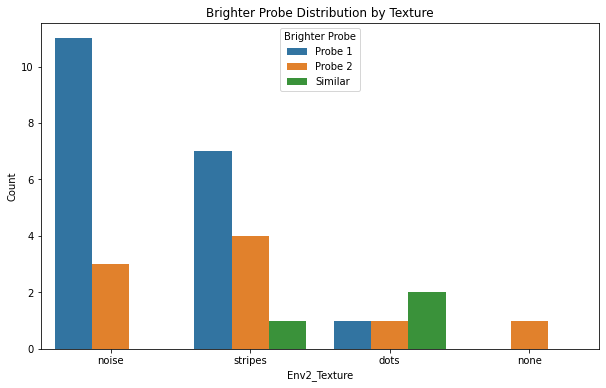

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定义筛选条件
condition = (
    (Adata['Probe 1 Color'] == Adata['Probe 2 Color']) &
    (Adata['Probe 1 Brightness'] == Adata['Probe 2 Brightness']) &
    (Adata['Environment 1 Color'] == Adata['Environment 2 Color']) &
    (Adata['Environment 1 Brightness'] == Adata['Environment 2 Brightness']) &
    ((Adata['Env1_Texture'] != 'none') | (Adata['Env2_Texture'] != 'none')) & 
    (Adata['Environment 2 Saturation'] == 1.0)
)
texture_filtered_Adata = Adata[condition]
           
print(texture_filtered_Adata[['Index', 'Env1_Texture', 'Env2_Texture', 'Environment 2 Contrast', 'Brighter Probe']])


# 数据转化
texture_filtered_Adata['Brighter_Probe_Encoded'] = texture_filtered_Adata['Brighter Probe'].apply(encode_choice)


# 柱状图：每种纹理下Brighter Probe的分布
plt.figure(figsize=(10,6))
sns.countplot(data=texture_filtered_Adata, x='Env2_Texture', hue='Brighter Probe')
plt.title('Brighter Probe Distribution by Texture')
plt.ylabel('Count')
plt.show()

# # 小提琴图：不同纹理下Environment 2 Contrast的分布
# plt.figure(figsize=(10,6))
# sns.violinplot(data=texture_filtered_Adata, x='Env2_Texture', y='Environment 2 Contrast', hue='Brighter Probe')
# plt.title('Environment 2 Contrast Distribution by Texture and Brighter Probe')
# plt.show()






In [33]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mnlogit
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 定义筛选条件
condition = (
    (Adata['Probe 1 Color'] == Adata['Probe 2 Color']) &
    (Adata['Probe 1 Brightness'] == Adata['Probe 2 Brightness']) &
    (Adata['Environment 1 Color'] == Adata['Environment 2 Color']) &
    (Adata['Environment 1 Brightness'] == Adata['Environment 2 Brightness']) &
    ((Adata['Env1_Texture'] != 'none') | (Adata['Env2_Texture'] != 'none')) & 
    (Adata['Environment 2 Saturation'] == 1.0)
)
texture_filtered_Adata = Adata[condition]
           
print(texture_filtered_Adata[['Index', 'Env1_Texture', 'Env2_Texture', 'Environment 2 Contrast', 'Brighter Probe']])



# 数据转化
texture_filtered_Adata['Brighter_Probe_Encoded'] = texture_filtered_Adata['Brighter Probe'].apply(encode_choice)

contingency_table = pd.crosstab(texture_filtered_Adata['Env2_Texture'], texture_filtered_Adata['Brighter_Probe_Encoded'])
print(contingency_table)


chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}\np-value: {p}")




lm = ols('Brighter_Probe_Encoded ~ C(Env2_Texture)', data=texture_filtered_Adata).fit()
anova_table = sm.stats.anova_lm(lm, typ=2)
print(anova_table)



     Index Env1_Texture Env2_Texture  Environment 2 Contrast Brighter Probe
16      17         none        noise                    1.00        Probe 1
17      18         none        noise                    1.30        Probe 2
18      19         none        noise                    0.50        Probe 2
19      20         none        noise                    0.80        Probe 1
20      21         none      stripes                    1.00        Probe 1
21      22         none      stripes                    1.30        Probe 2
22      23         none      stripes                    0.40        Probe 2
23      24         none      stripes                    1.10        Similar
44      45         none         dots                    1.00        Probe 2
45      46         none         dots                    1.00        Similar
70      71         none        noise                    1.00        Probe 1
71      72         none        noise                    1.00        Probe 1
72      73  

/var/folders/3h/m626hrj16qvgkz5hfnwy740c0000gp/T/ipykernel_3444/3262675541.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texture_filtered_Adata['Brighter_Probe_Encoded'] = texture_filtered_Adata['Brighter Probe'].apply(encode_choice)


Index(['Index', 'Probe 1 Brightness', 'Probe 2 Brightness',
       'Environment 1 Brightness', 'Environment 2 Brightness', 'Env1_Texture',
       'Env2_Texture', 'Environment 2 Contrast', 'Environment 2 Saturation',
       'Brighter Probe', 'Probe 2 Red', 'Probe 2 Green', 'Probe 2 Blue',
       'Probe 1 Color_R', 'Probe 1 Color_G', 'Probe 1 Color_B',
       'Probe 2 Color_R', 'Probe 2 Color_G', 'Probe 2 Color_B',
       'Environment 1 Color_R', 'Environment 1 Color_G',
       'Environment 1 Color_B', 'Environment 2 Color_R',
       'Environment 2 Color_G', 'Environment 2 Color_B', 'Cluster'],
      dtype='object')


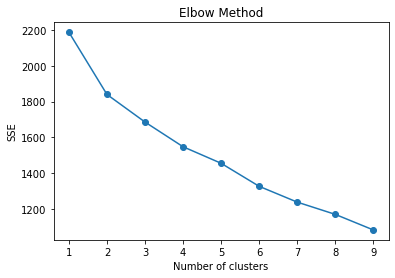

         Index  Probe 1 Brightness  Probe 2 Brightness  \
Cluster                                                  
0       114.81                0.58                0.60   
1       170.07                0.56                0.56   
2        60.98                0.60                0.60   
3        36.00                0.21                0.29   
4       135.40                0.58                0.58   
5       112.50                0.59                0.59   

         Environment 1 Brightness  Environment 2 Brightness  \
Cluster                                                       
0                          151.43                    142.14   
1                          175.45                    171.97   
2                          146.68                    148.00   
3                          150.00                    150.00   
4                          147.60                    149.30   
5                          150.00                    150.00   

         Environment 2 Contras

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# # 对纹理类型进行编码
# le = LabelEncoder()
# texture_encoded = le.fit_transform(texture_filtered_Adata['Env2_Texture'])

# X = pd.DataFrame({
#     'Texture': texture_encoded,
#     'Brighter_Probe_Encoded': texture_filtered_Adata['Brighter_Probe_Encoded']
# })

# # 使用K-means进行聚类
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(X)

# texture_filtered_Adata['Cluster'] = clusters
# print(texture_filtered_Adata.groupby('Cluster').mean())



import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


print(Adata.columns)

# 2 & 3. 定义预处理器
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), Adata.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(drop='first'), ['Env1_Texture', 'Env2_Texture', 'Brighter Probe'])  # Using drop='first' to avoid collinearity
    ])

X = preprocessor.fit_transform(Adata)

# 4. 肘部法则
sse = []
cluster_list = range(1, 10)
for k in cluster_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure()
plt.plot(cluster_list, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


# 5. K-means聚类
chosen_clusters = 6  # 你可以根据上述肘部法则图选择一个合适的簇数
kmeans = KMeans(n_clusters=chosen_clusters, random_state=42)
Adata['Cluster'] = kmeans.fit_predict(X)
print(Adata.groupby('Cluster').mean())

# 预设场景分析

In [44]:
import pandas as pd

def merge_files(file_list):
    # 使用list comprehension读取每个文件并创建一个DataFrame列表
    df_list = [pd.read_csv(file) for file in file_list]
    
    # 使用pandas.concat合并所有的DataFrames
    merged_df = pd.concat(df_list, ignore_index=True)
    
    return merged_df

# 文件列表
files = ['1user_choices_16.csv', '2user_choices_16.csv', '3user_choices_16.csv', '4user_choices_16.csv',
         '5user_choices_16.csv', '6user_choices_16.csv', '7user_choices_16.csv', '8user_choices_16.csv',
         '9user_choices_16.csv', '10user_choices_16.csv']

# 合并数据
merged_data = merge_files(files)

# 如果你想保存合并后的数据到一个新的CSV文件，可以使用：
merged_data.to_csv('PresetData.csv', index=False)



In [45]:
data_path = '/Users/jenny/Desktop/ProjectCode/PresetData.csv' # 文件路径
data = pd.read_csv(data_path)

# data 是原始数据框，复制到Adata中，进行后续操作
Bdata = data.copy()

Bdata.info()

# 打印数据的前5行
print(Bdata.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              160 non-null    int64  
 1   Scene              160 non-null    object 
 2   Env1 Color         160 non-null    object 
 3   Env2 Color         160 non-null    object 
 4   Env1 Brightness    160 non-null    int64  
 5   Env2 Brightness    160 non-null    int64  
 6   Env1 Texture       160 non-null    object 
 7   Env2 Texture       160 non-null    object 
 8   Probe1 Color       160 non-null    object 
 9   Probe2 Color       160 non-null    object 
 10  Probe1 Brightness  160 non-null    float64
 11  Probe2 Brightness  160 non-null    float64
 12  Probe1 Contrast    160 non-null    float64
 13  Probe2 Contrast    160 non-null    float64
 14  Choice             160 non-null    object 
dtypes: float64(4), int64(3), object(8)
memory usage: 18.9+ KB
   Index    Scen

Probe 1    79
Probe 2    73
Similar     8
Name: Choice, dtype: int64
Choice    Probe 1  Probe 2  Similar
Scene                              
Scene 1      0.00    10.00     0.00
Scene 10    10.00     0.00     0.00
Scene 11     5.00     4.00     1.00
Scene 12     2.00     8.00     0.00
Scene 13     7.00     3.00     0.00
Scene 14     2.00     8.00     0.00
Scene 15     2.00     8.00     0.00
Scene 16     1.00     9.00     0.00
Scene 2      2.00     3.00     5.00
Scene 3      4.00     6.00     0.00
Scene 4      0.00    10.00     0.00
Scene 5     10.00     0.00     0.00
Scene 6     10.00     0.00     0.00
Scene 7      6.00     3.00     1.00
Scene 8     10.00     0.00     0.00
Scene 9      8.00     1.00     1.00


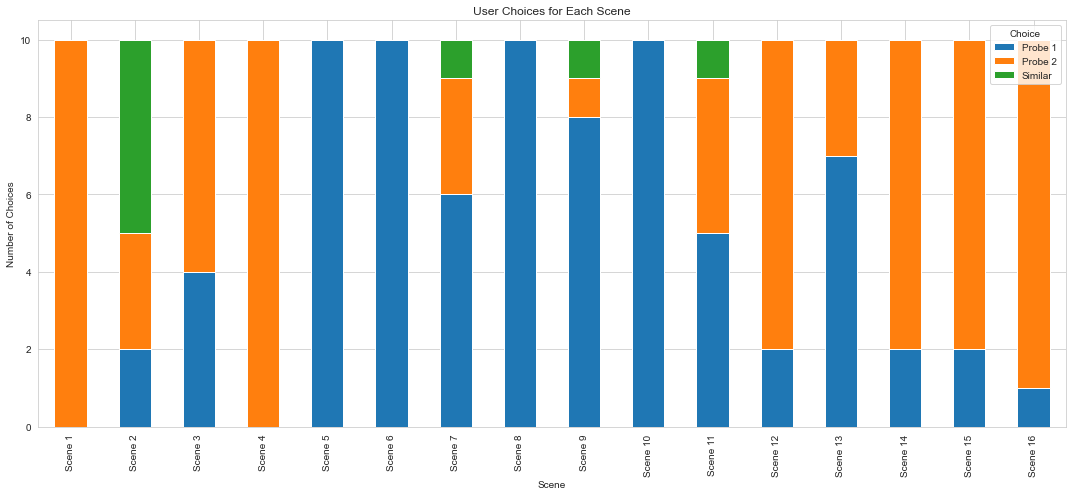

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每个场景中用户选择的probe数量
overall_choice_counts = Bdata['Choice'].value_counts()
print(overall_choice_counts)

# 计算每个场景中用户选择的probe数量
scene_choice_counts = Bdata.groupby('Scene')['Choice'].value_counts().unstack().fillna(0)
print(scene_choice_counts)



# 设置风格
sns.set_style("whitegrid")

# 确保场景按照指定的顺序排列
Bdata['Scene'] = pd.Categorical(Bdata['Scene'], categories=[f'Scene {i}' for i in range(1, 17)], ordered=True)

# 计算每个场景中用户选择的probe数量
scene_choice_counts = Bdata.groupby('Scene')['Choice'].value_counts().unstack().fillna(0)

# 创建一个条形图
scene_choice_counts.plot(kind='bar', stacked=True, figsize=(15, 7))

# 设置标题和标签
plt.title('User Choices for Each Scene')
plt.xlabel('Scene')
plt.ylabel('Number of Choices')
plt.legend(title='Choice')

# 显示图表
plt.tight_layout()
plt.show()


# 背景亮度

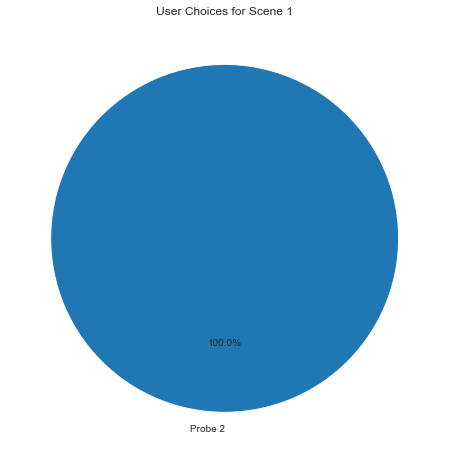

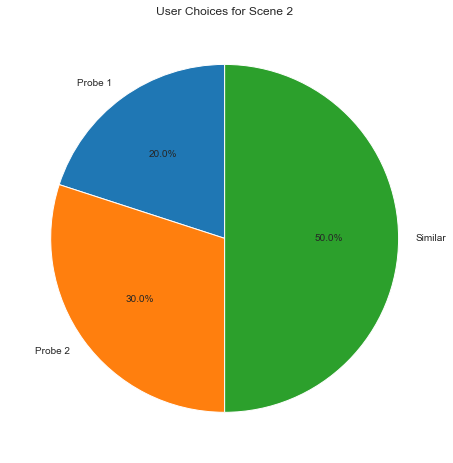

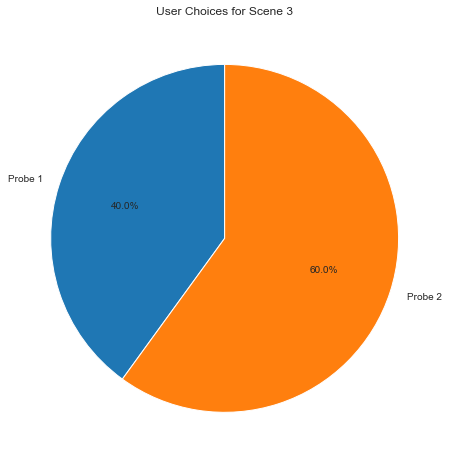

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns



# 获取场景1-3的数据
scenes = ["Scene 1", "Scene 2", "Scene 3"]
Afiltered_data = Bdata[Bdata['Scene'].isin(scenes)]

# 分组数据并计算每种选择的总数
grouped_data = Afiltered_data.groupby('Choice').size()

# 绘制饼图
for scene in scenes:
    scene_data = Afiltered_data[filtered_data['Scene'] == scene]
    grouped_scene_data = scene_data.groupby('Choice').size()
    plt.figure(figsize=(8, 8))
    plt.pie(grouped_scene_data, labels=grouped_scene_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'User Choices for {scene}')
    plt.show()



# 背景颜色

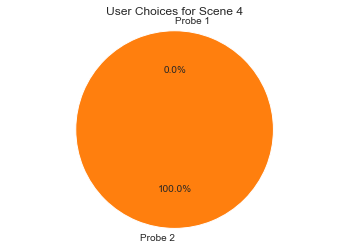

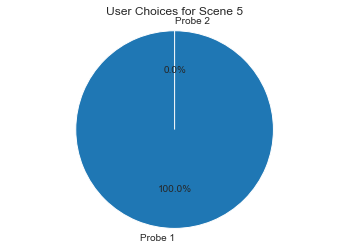

In [54]:
# 获取场景4、5的数据
scenes = ["Scene 4", "Scene 5"]
Bfiltered_data = Bdata[Bdata['Scene'].isin(scenes)]

# 对场景和选择进行分组并计数
scene_choice_counts = Bfiltered_data.groupby(['Scene', 'Choice']).size()

# 对于场景4和5，绘制饼图

for scene in scenes:
    counts = scene_choice_counts[scene]
    labels = counts.index.tolist()
    sizes = counts.values.tolist()
    
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'User Choices for {scene}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()



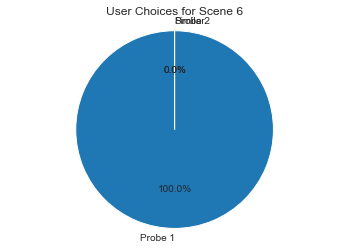

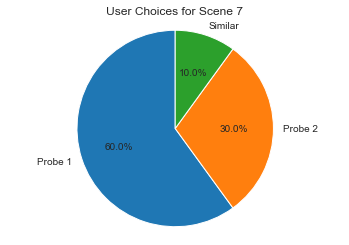

In [55]:
# 获取场景6、7的数据
scenes = ["Scene 6", "Scene 7"]
Cfiltered_data = Bdata[Bdata['Scene'].isin(scenes)]

# 对场景和选择进行分组并计数
scene_choice_counts = Cfiltered_data.groupby(['Scene', 'Choice']).size()

# 对于场景6和7，绘制饼图
for scene in scenes:
    counts = scene_choice_counts[scene]
    labels = counts.index.tolist()
    sizes = counts.values.tolist()
    
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'User Choices for {scene}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()



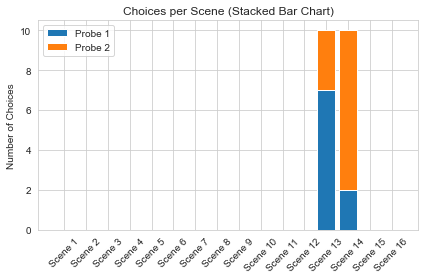

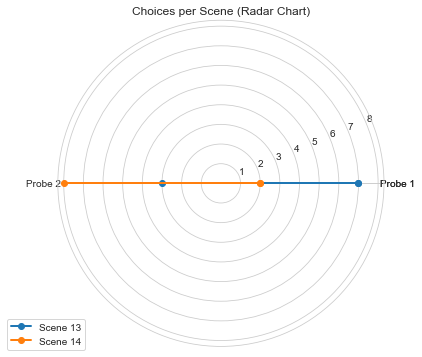

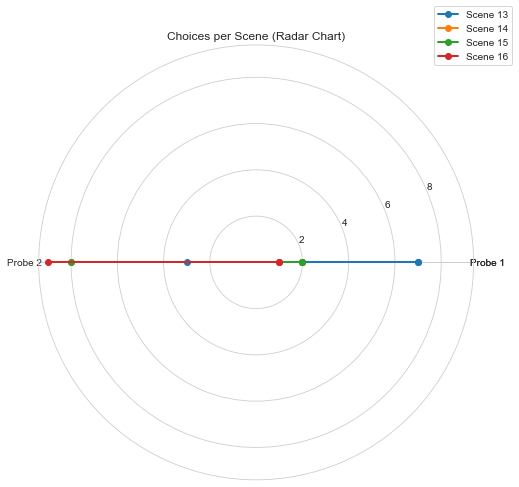

In [64]:
# 获取场景13、14的数据
scenes = ["Scene 13", "Scene 14"]
Dfiltered_data = Bdata[Bdata['Scene'].isin(scenes)]

# 对场景和选择进行分组并计数
grouped_data = Dfiltered_data.groupby(['Scene', 'Choice']).size().unstack().fillna(0)

# 堆叠柱状图
scenes = ["Scene 13", "Scene 14"]
choices = grouped_data.columns.tolist()
for choice in choices:
    plt.bar(grouped_data.index, grouped_data[choice], label=choice, bottom=grouped_data[choices[0:choices.index(choice)]].sum(axis=1))
plt.legend()
plt.ylabel('Number of Choices')
plt.title('Choices per Scene (Stacked Bar Chart)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 雷达图
labels = np.array(choices)
stats_scene13 = grouped_data.loc["Scene 13"].values
stats_scene14 = grouped_data.loc["Scene 14"].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats_scene13=np.concatenate((stats_scene13,[stats_scene13[0]]))
stats_scene14=np.concatenate((stats_scene14,[stats_scene14[0]]))
angles=np.concatenate((angles,[angles[0]]))
labels = np.append(labels, labels[0])  # 添加额外的标签

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, stats_scene13, 'o-', linewidth=2, label="Scene 13")
ax.fill(angles, stats_scene13, alpha=0.25)
ax.plot(angles, stats_scene14, 'o-', linewidth=2, label="Scene 14")
ax.fill(angles, stats_scene14, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
plt.title('Choices per Scene (Radar Chart)')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()




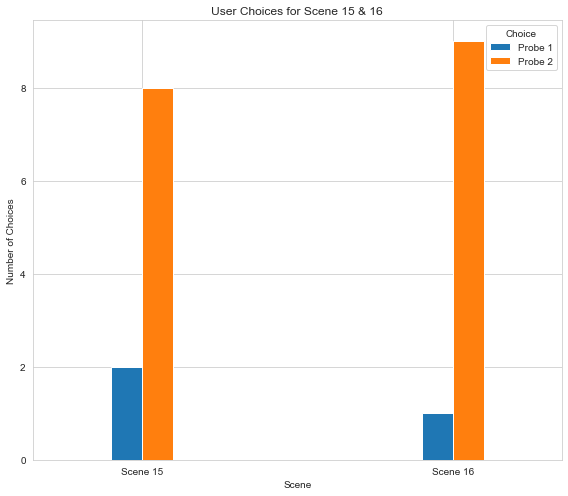

In [72]:
# 仅选择场景15和16的数据
selected_scenes_data = grouped_data.loc[["Scene 15", "Scene 16"]]

# 使用selected_scenes_data制作柱状图
ax = selected_scenes_data.plot(kind='bar', figsize=(8, 7), width=0.2)

# 设置图形属性
ax.set_ylabel("Number of Choices")
ax.set_title("User Choices for Scene 15 & 16")
ax.set_xticklabels(selected_scenes_data.index, rotation=0)
plt.tight_layout()

# 显示图形
plt.show()


# 首先，根据你的描述，我将对每个变化进行分类，并对每一类数据进行分析。这样可以更好地理解每个变量的影响。

1. **背景亮度**:
   - 场景1-3主要控制了背景亮度。
     - 在场景1中，`Env1 Brightness`比`Env2 Brightness`明显高，用户选择了`Probe 2`。
     - 在场景2中，两者的亮度相对接近，用户选择了`Similar`。
     - 在场景3中，`Env1 Brightness`稍高于`Env2 Brightness`，用户再次选择了`Probe 2`。

     **结论**: 较高的背景亮度可能会让用户倾向于选择`Probe 2`，当背景亮度相近时，用户可能会认为两者相似。

2. **背景颜色**:
   - 场景4-5主要控制了背景颜色。
     - 在这两个场景中，背景颜色都是截然不同的，用户在两者中都选择了`Probe 2`。

     **结论**: 当背景颜色发生变化时，用户可能会偏向选择`Probe 2`。

3. **背景纹理**:
   - 场景6-7控制了背景纹理。
     - 在场景6中，`Env2 Texture`是noise，用户选择了`Probe 1`。
     - 在场景7中，`Env2 Texture`是stripes，用户选择了`Probe 1`。

     **结论**: 不同的背景纹理似乎会导致用户选择`Probe 1`。

4. **光照强度**:
   - 场景8-10模拟了不同的光照强度。
     - 在所有这些场景中，用户都选择了`Probe 1`。

     **结论**: 光照强度的变化似乎使用户偏向于选择`Probe 1`。

5. **光照色温**:
   - 场景11-12模拟了不同的光照色温。
     - 在场景11中，`Probe2 Color`与`Env1`和`Env2`的颜色不同，用户选择了`Probe 1`。
     - 在场景12中，`Probe2 Color`与`Env1`和`Env2`的颜色稍有不同，用户选择了`Probe 2`。

     **结论**: 当`Probe2`的颜色与背景色相近时，用户可能会选择`Probe 2`，但如果颜色远离背景色，用户可能会选择`Probe 1`。

6. **背景饱和度**:
   - 场景13-14改变了`Probe2`的背景饱和度。
     - 在场景13中，`Probe2 Contrast`较高，用户选择了`Probe 1`。
     - 在场景14中，`Probe2 Contrast`较低，用户选择了`Probe 2`。

     **结论**: `Probe2`的高对比度可能会导致用户选择`Probe 1`，而低对比度则导致用户选择`Probe 2`。

7. **纹理对比度**:
   - 场景15-16控制了纹理和对比度。
     - 在这两个场景中，用户都选择了`Probe 2`，尽管`Probe2 Contrast`在场景16中较低。

     **结论**: 在存在明显纹理时，即使对比度发生变化，用户似乎仍然更倾向于选择`Probe 2`。

通过以上分析，可以得到每个因素对用户选择的影响。当然，为了得到更深入的见解，您可能需要进行进一步的统计分析和实验，但这为您提供了一个基本的了解。